<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Lockdown%201/Patision(UT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyparsing.helpers import PrecededBy
url='https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/main/Lockdown%201/DATA/PatisionLock.csv'
df = pd.read_csv(url)
print(df)

       DAY  SO2MEAN  SO2MIN  SO2MAX  SO220  SO221  COMEAN  COMIN  COMAX  CO20  \
0    1-Mar      5.3     3.2     7.9   18.6    2.5     1.6    1.3    1.8   1.1   
1    2-Mar      5.6     4.6     6.4   20.3    2.1     1.2    0.8    1.6   1.1   
2    3-Mar      7.5     3.3    14.1   16.3    2.7     1.7    1.5    2.0   0.7   
3    4-Mar      8.1     5.6    15.0   18.1    8.3     1.4    1.2    1.5   0.7   
4    5-Mar      7.5     5.5     9.8   19.7    6.0     1.2    1.0    1.3   1.0   
..     ...      ...     ...     ...    ...    ...     ...    ...    ...   ...   
87  27-May      6.4     2.3     9.3    2.2    8.8     0.8    0.2    1.4   0.9   
88  28-May      6.0     2.3     8.6    3.0    9.0     0.7    0.3    1.3   1.1   
89  29-May      5.7     2.5     8.1    4.6    7.4     0.7    0.4    1.3   1.3   
90  30-May      5.8     2.8     8.1    4.4    7.6     1.3    0.7    1.7   1.0   
91  31-May      5.9     3.3     9.0    4.8    8.6     1.4    0.6    1.9   0.8   

    ...  N02MEAN  NO2MIN  N

In [3]:
def perc(a,b):
  x=abs(a-b)
  y=(a+b)/2
  return (x/y)*100

## **$SO_{2}$**

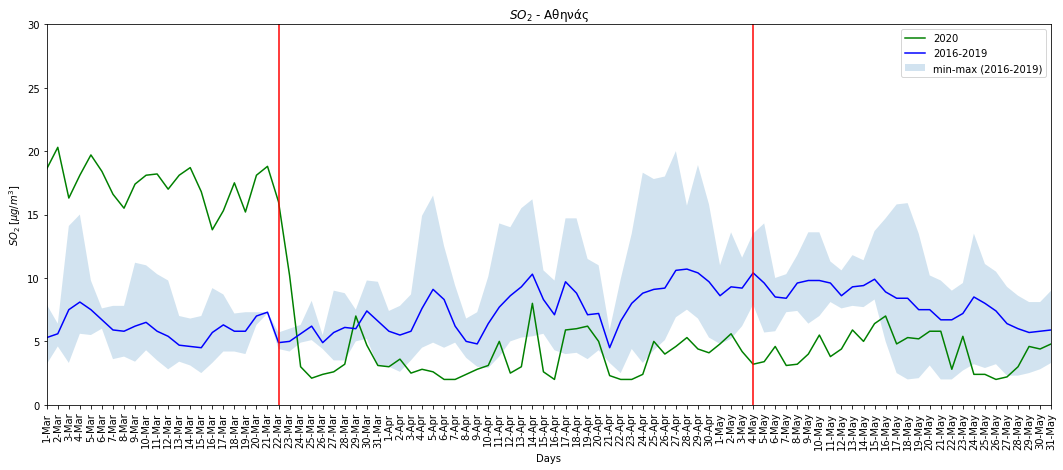

In [5]:
plt.figure(figsize=(18,7))
plt.title("$SO_{2}$ - Aθηνάς")

plt.xlabel('Days')
plt.ylabel('$SO_{2} \: [μg/m^{3}$]')

plt.title("$SO_{2}$ - Aθηνάς")

x=[]
for i in df['SO220']:
  if i==0:
    x+=[None]
  else:
    x+=[i]

plt.plot(df['DAY'], x, 'g', label='2020')
plt.plot(df['DAY'], df['SO2MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['SO2MIN'], df['SO2MAX'], alpha=0.2, label='min-max (2016-2019)')
plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,30)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

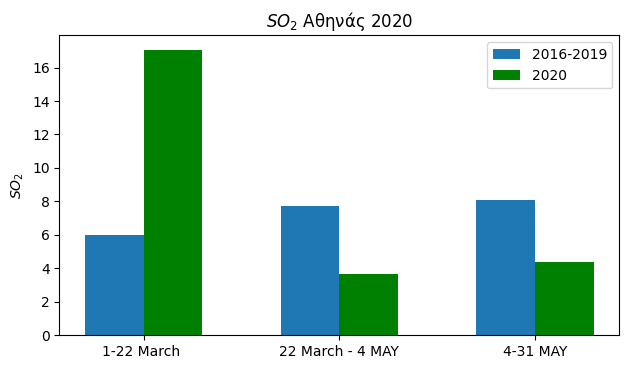

2020
Percentage Difference Pre-Lockdown to Lockdown = 129.01 % 
Percentage Difference Lockdown to Post-Lockdown = 16.82 % 

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 25.10 % 
Percentage Difference Lockdown to Post-Lockdown = 4.61 % 


In [7]:
Data=np.array(df['SO220'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Postnew=[]
for c in Post:
  if c!=0:
    Postnew+=[c]

Data=np.array(df['SO2MEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]


Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Postnew))    # Set of B data

names= ['1-22 March ', '22 March - 4 MAY', '4-31 MAY']     # Set of names for x asis 

fig = plt.figure(figsize=(7,5), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.3
ticks = np.arange(len(names))    
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')

ax.set_ylabel('$SO_{2}$')
ax.set_title('$SO_{2}$ Aθηνάς 2020')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Postnew))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))


print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))

## **CO**

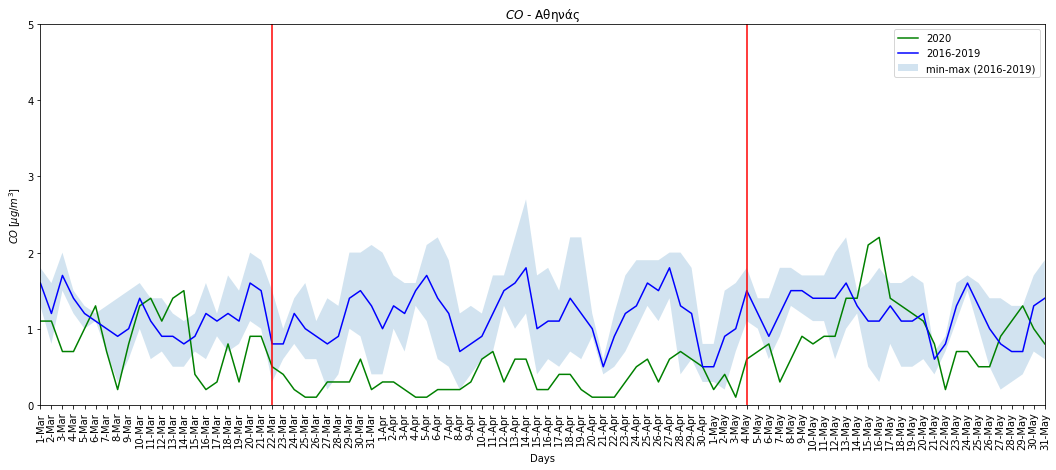

In [14]:
plt.figure(figsize=(18,7))
plt.title("$CO$ - Aθηνάς")

plt.xlabel('Days')
plt.ylabel('$CO \: [μg/m^{3}$]')

plt.title("$CO$ - Aθηνάς")


plt.plot(df['DAY'], df['CO20'], 'g', label='2020')
plt.plot(df['DAY'], df['COMEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['COMIN'], df['COMAX'], alpha=0.2 ,label='min-max (2016-2019)')
plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,5)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

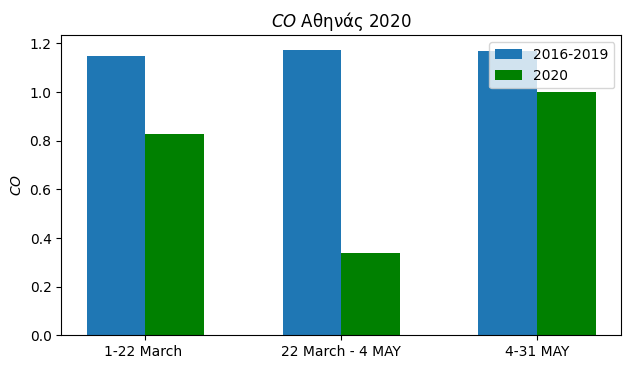

2020
Percentage Difference Pre-Lockdown to Lockdown = 83.48 % 
Percentage Difference Lockdown to Post-Lockdown = 98.61 % 

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 2.29 % 
Percentage Difference Lockdown to Post-Lockdown = 0.55 % 


In [11]:
Data=np.array(df['CO20'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Data=np.array(df['COMEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]


Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Post))    # Set of B data

names= ['1-22 March ', '22 March - 4 MAY', '4-31 MAY']     # Set of names for x asis 

fig = plt.figure(figsize=(7,5), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.3
ticks = np.arange(len(names))    
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')

ax.set_ylabel('$CO}$')
ax.set_title('$CO$ Aθηνάς 2020')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()


print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))


print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))

## **NO**

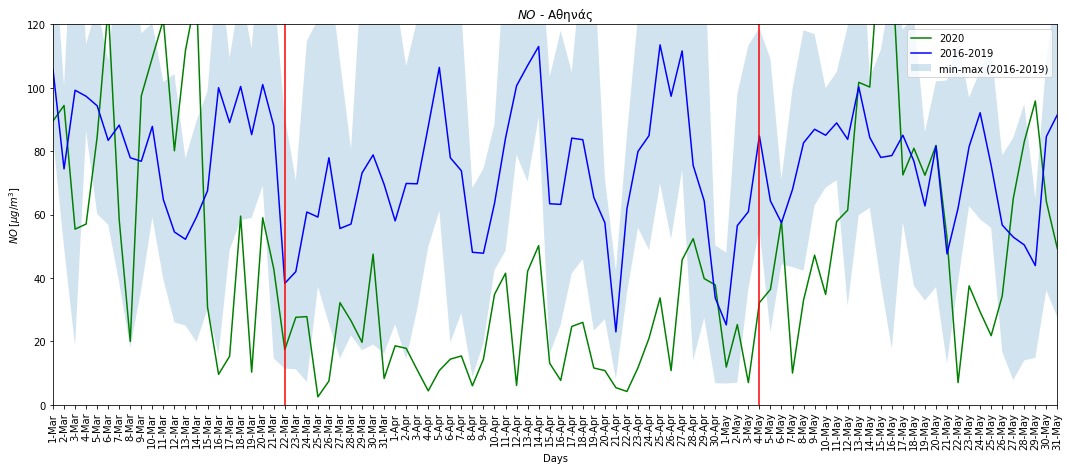

In [27]:
plt.figure(figsize=(18,7))
plt.title("$NO$ - Aθηνάς")

plt.xlabel('Days')
plt.ylabel('$NO \: [μg/m^{3}$]')

plt.title("$NO$ - Aθηνάς")


plt.plot(df['DAY'], df['NO20'], 'g', label='2020')
plt.plot(df['DAY'], df['NOMEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['NOMIN'], df['NOMAX'], alpha=0.2 ,label='min-max (2016-2019)')

plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,120)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

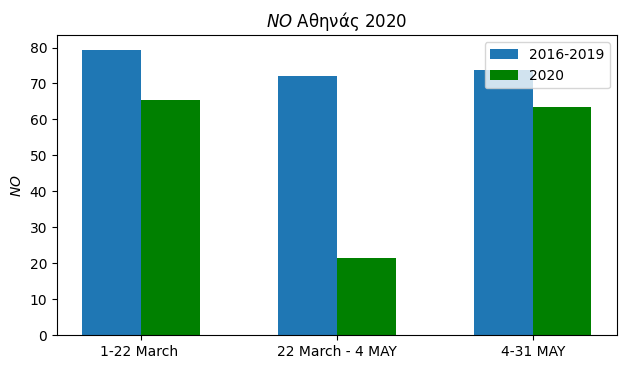

2020
Percentage Difference Pre-Lockdown to Lockdown = 100.83 % 
Percentage Difference Lockdown to Post-Lockdown = 98.60 % 

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 9.89 % 
Percentage Difference Lockdown to Post-Lockdown = 2.64 % 


In [13]:
Data=np.array(df['NO20'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Data=np.array(df['NOMEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Post))    # Set of B data

names= ['1-22 March ', '22 March - 4 MAY', '4-31 MAY']     # Set of names for x asis 

fig = plt.figure(figsize=(7,5), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.3
ticks = np.arange(len(names))    
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')


ax.set_ylabel('$NO$')
ax.set_title('$NO$ Aθηνάς 2020')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))

## **$NO_{2}$**

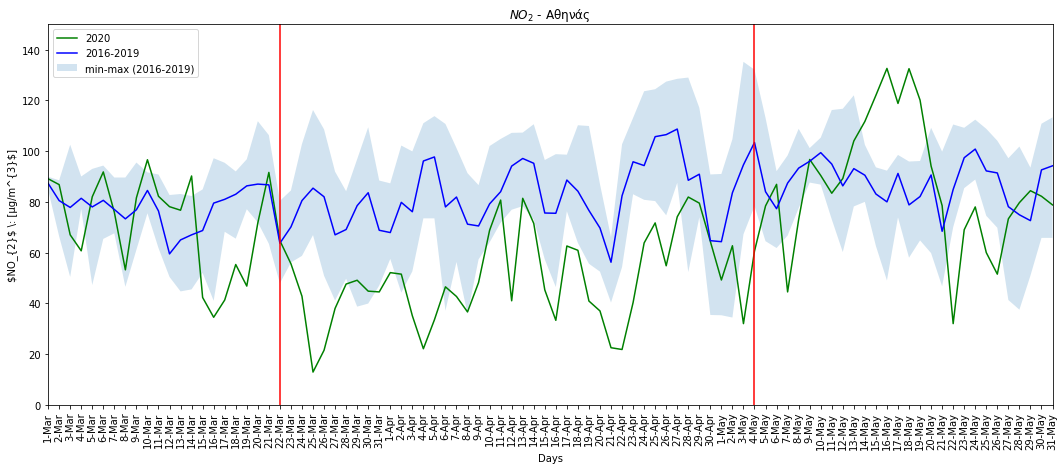

In [18]:
plt.figure(figsize=(18,7))
plt.title("$NO_{2}$ - Aθηνάς")

plt.xlabel('Days')
plt.ylabel('$NO_{2}$ \: [μg/m^{3}$]')

plt.title("$NO_{2}$ - Aθηνάς")



plt.plot(df['DAY'], df['NO220'], 'g', label='2020')
plt.plot(df['DAY'], df['N02MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['NO2MIN'], df['NO2MAX'], alpha=0.2, label='min-max (2016-2019)')

plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,150)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

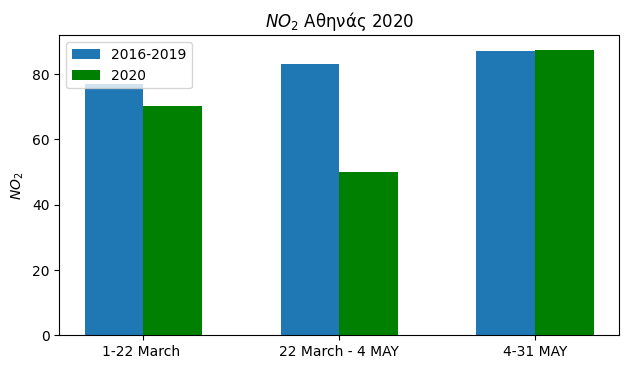

2020
Percentage Difference Pre-Lockdown to Lockdown = 33.65 % 
Percentage Difference Lockdown to Post-Lockdown = 54.56 % 

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 7.73 % 
Percentage Difference Lockdown to Post-Lockdown = 4.57 % 


In [20]:
Data=np.array(df['NO220'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Data=np.array(df['N02MEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Post))    # Set of B data

names= ['1-22 March ', '22 March - 4 MAY', '4-31 MAY']     # Set of names for x asis 

fig = plt.figure(figsize=(7,5), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.3
ticks = np.arange(len(names))    
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')

ax.set_ylabel('$NO_{2}$')
ax.set_title('$NO_{2}$ Aθηνάς 2020')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))

## **$O_{3}$**

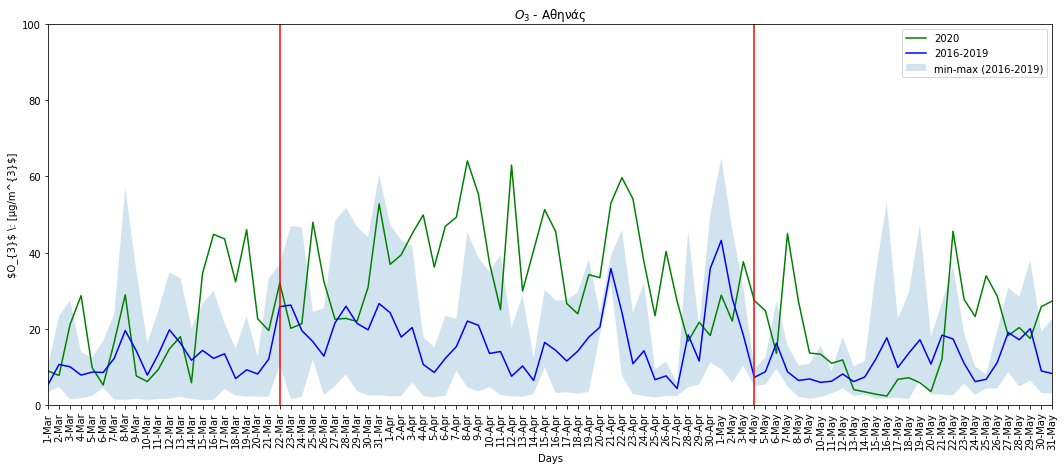

In [44]:
plt.figure(figsize=(18,7))
plt.title("$O_{3}$ - Aθηνάς")

plt.xlabel('Days')
plt.ylabel('$O_{3}$ \: [μg/m^{3}$]')

plt.title("$O_{3}$ - Aθηνάς")



plt.plot(df['DAY'], df['O320'], 'g', label='2020')
plt.plot(df['DAY'], df['O3MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['O3MIN'], df['O3MAX'], alpha=0.2,label='min-max (2016-2019)')

plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,100)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

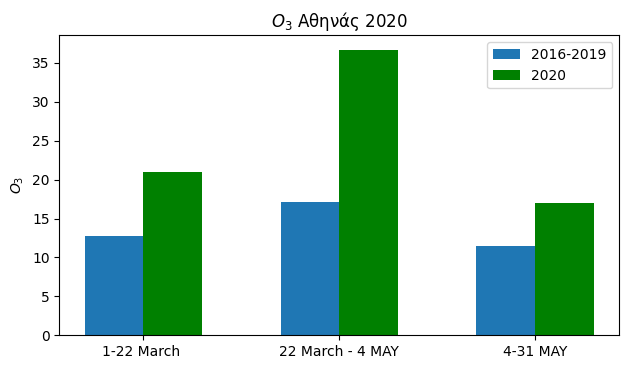

2020
Percentage Difference Pre-Lockdown to Lockdown = 54.35 % 
Percentage Difference Lockdown to Post-Lockdown = 73.70 % 

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 29.22 % 
Percentage Difference Lockdown to Post-Lockdown = 39.18 % 


In [46]:
Data=np.array(df['O320'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]


Postnew=[]
for c in Post:
  if c!=0:
    Postnew+=[c]


Data=np.array(df['O3MEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]


Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Postnew))    # Set of B data

names= ['1-22 March ', '22 March - 4 MAY', '4-31 MAY']     # Set of names for x asis 

fig = plt.figure(figsize=(7,5), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.3
ticks = np.arange(len(names))    
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')



ax.set_ylabel('$O_{3}$')
ax.set_title('$O_{3}$ Aθηνάς 2020')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()


print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Postnew))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))


print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))


# $C_{6}H_{6}$

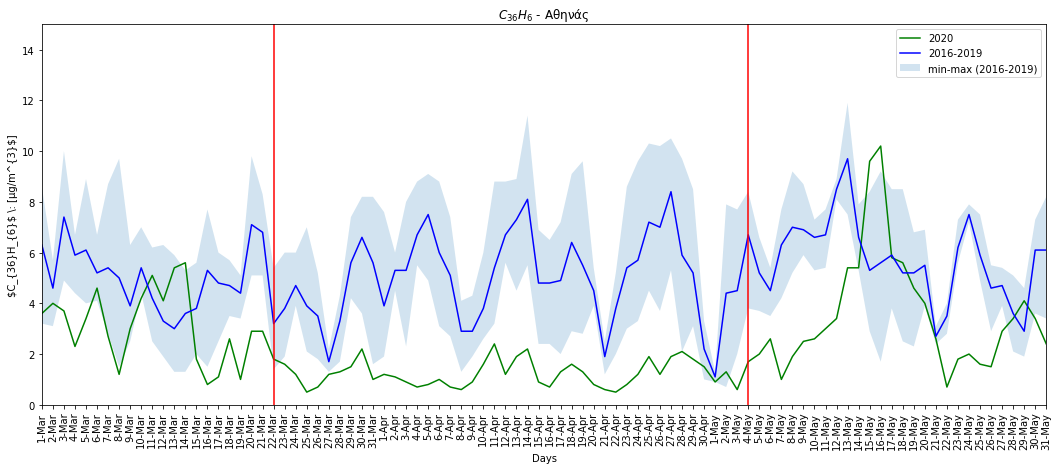

In [51]:
plt.figure(figsize=(18,7))
plt.title("$C_{36}H_{6}$ - Aθηνάς")

plt.xlabel('Days')
plt.ylabel('$C_{36}H_{6}$ \: [μg/m^{3}$]')

plt.title("$C_{36}H_{6}$ - Aθηνάς")



plt.plot(df['DAY'], df['BEN20'], 'g', label='2020')
plt.plot(df['DAY'], df['BENMEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['BENMIN'], df['BENMAX'], alpha=0.2,label='min-max (2016-2019)')

plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,15)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

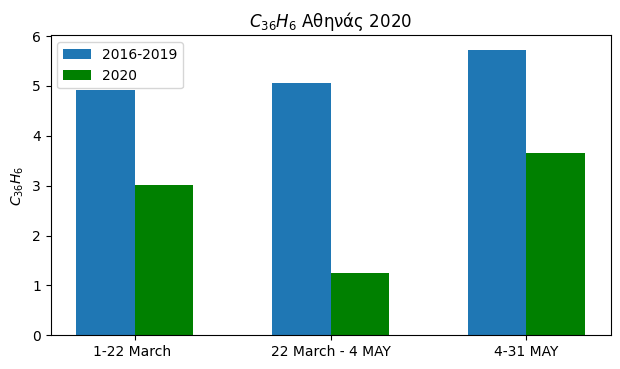

2020
Percentage Difference Pre-Lockdown to Lockdown = 83.37 % 
Percentage Difference Lockdown to Post-Lockdown = 98.74 % 

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 2.64 % 
Percentage Difference Lockdown to Post-Lockdown = 12.51 % 


In [54]:
Data=np.array(df['BEN20'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]


Postnew=[]
for c in Post:
  if c!=0:
    Postnew+=[c]


Data=np.array(df['BENMEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]


Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Postnew))    # Set of B data

names= ['1-22 March ', '22 March - 4 MAY', '4-31 MAY']     # Set of names for x asis 

fig = plt.figure(figsize=(7,5), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.3
ticks = np.arange(len(names))    
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')



ax.set_ylabel('$C_{36}H_{6}$')
ax.set_title('$C_{36}H_{6}$ Aθηνάς 2020')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()


print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Postnew))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))


print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))
